In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
# read the data
df = pd.read_csv('cleaneD_attacked_data.csv')
df.head()

,country,branches_count,revenue_range,employees_range,industry,year_founded,source
0,73.0,0.0,-1.0,4.0,-1.0,1995.0,5.0
1,73.0,4.0,4.0,16.0,1.0,1986.0,5.0
2,30.0,0.0,6.0,33.0,4.0,1994.0,5.0
3,4.0,0.0,-1.0,107.0,-1.0,1975.6,5.0
4,46.0,0.0,4.0,11.0,1.0,1945.0,5.0


In [26]:
df.source.value_counts()

5.0    583
4.0    221
2.0    155
3.0    148
0.0    131
1.0     80
Name: source, dtype: int64

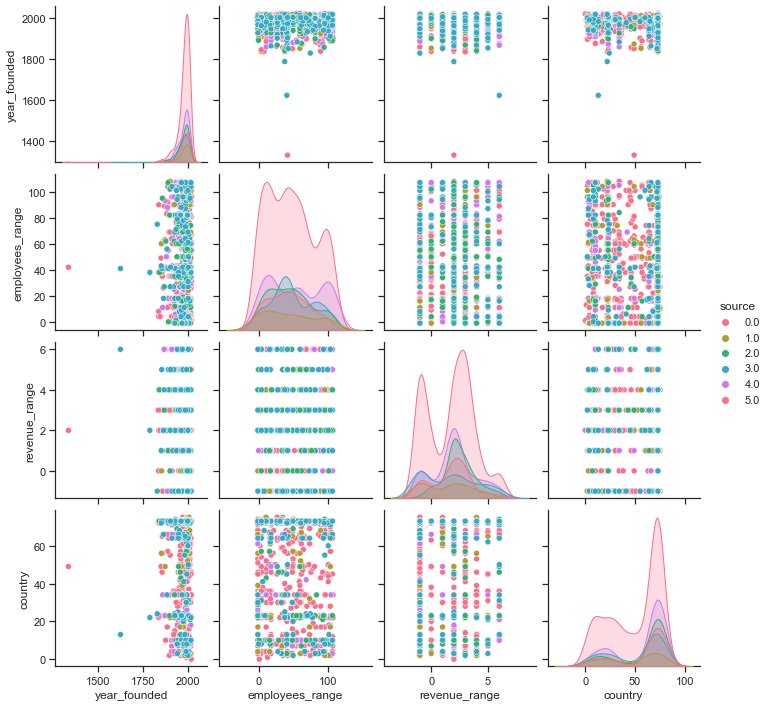

In [27]:
# draw grid plot for all features
def draw_grid_plot(df):
    # draw grid plot for all features
    sns.set(style="ticks")
    sns.pairplot(df[["year_founded","employees_range","revenue_range","country", "source" ]],hue="source", palette="husl")
    plt.show()
  
# draw grid plot for all features
draw_grid_plot(df)


In [28]:
# preprocess the year founded to be a decade
def preprocess_year_founded(df):
    df['decade'] = df['year_founded'].apply(lambda x: int(x/10)*10)
    return df

# preprocess the year founded to be a decade
df = preprocess_year_founded(df)

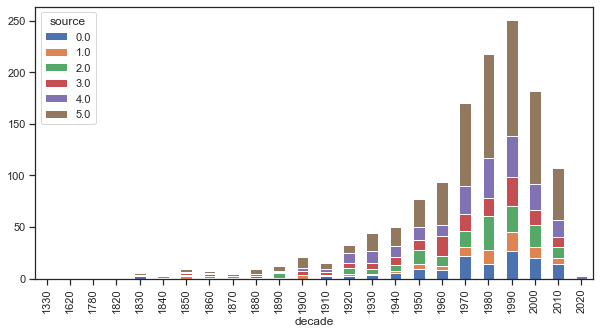

In [29]:
# explore the relationship between source and year_founded
def draw_year_founded(df):
    
    # explore the relationship between source and decade using stacked bar chart
    df_year_founded = df.groupby(['source','decade']).size().reset_index(name='counts')
    df_year_founded = df_year_founded.pivot(index='decade', columns='source', values='counts')
    # increase the figure size
    plt.rcParams['figure.figsize'] = [10, 5]
    df_year_founded.plot(kind='bar', stacked=True)
    plt.show()


# explore the relationship between source and year_founded
draw_year_founded(df)


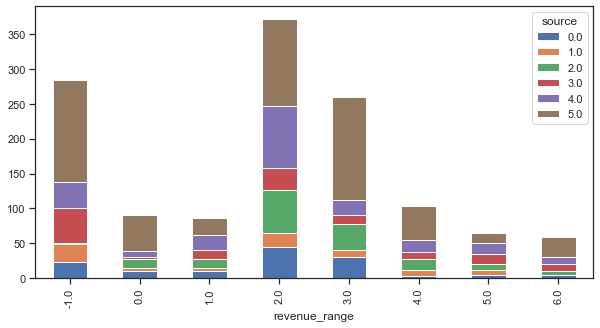

In [30]:
# explore the relationship between source and revenue_range
def draw_revenue_range(df):
        
        # explore the relationship between source and revenue_range using stacked bar chart
        df_revenue_range = df.groupby(['source','revenue_range']).size().reset_index(name='counts')
        df_revenue_range = df_revenue_range.pivot(index='revenue_range', columns='source', values='counts')
        # increase the figure size
        plt.rcParams['figure.figsize'] = [10, 5]
        df_revenue_range.plot(kind='bar', stacked=True)
        plt.show()

# explore the relationship between source and revenue_range
draw_revenue_range(df)



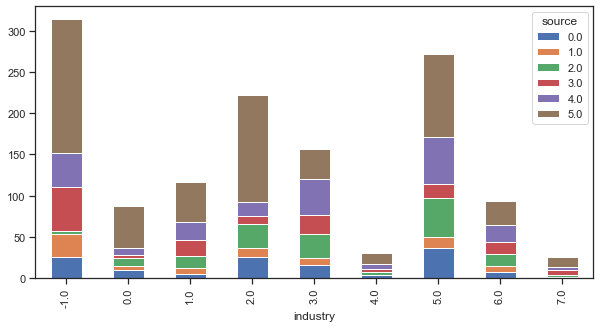

In [31]:
# explore the relationship between source and Industry
def draw_industry_range(df):
        # explore the relationship between source and industry using stacked bar chart
        df_industry_range = df.groupby(['source','industry']).size().reset_index(name='counts')
        df_industry_range = df_industry_range.pivot(index='industry', columns='source', values='counts')
        # increase the figure size
        plt.rcParams['figure.figsize'] = [10, 5]
        df_industry_range.plot(kind='bar', stacked=True)
        plt.show()

# explore the relationship between source and industry
draw_industry_range(df)



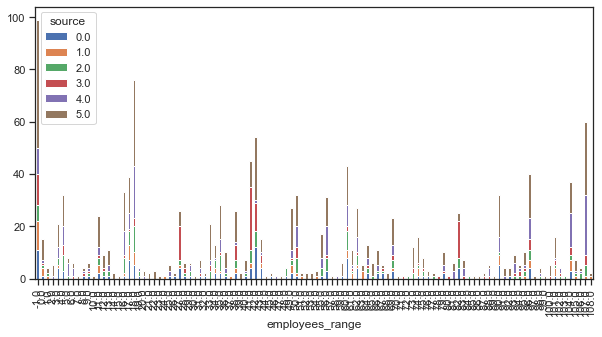

In [33]:
# explore the relationship between source and employees_range
def draw_employees_range(df):
        
        # explore the relationship between source and revenue_range using stacked bar chart
        df_employees_range = df.groupby(['source','employees_range']).size().reset_index(name='counts')
        df_employees_range = df_employees_range.pivot(index='employees_range', columns='source', values='counts')
        # increase the figure size
        plt.rcParams['figure.figsize'] = [10, 5]
        df_employees_range.plot(kind='bar', stacked=True)
        plt.show()

# explore the relationship between source and revenue_range
draw_employees_range(df)



In [6]:
# take a sample of the data that represents the rows where the source = 5.0 (lockbit)
df_sample = df[df['source'] == 5.0]
df_sample.head()

,country,branches_count,revenue_range,employees_range,industry,year_founded,source
0,73.0,0.0,-1.0,4.0,-1.0,1995.0,5.0
1,73.0,4.0,4.0,16.0,1.0,1986.0,5.0
2,30.0,0.0,6.0,33.0,4.0,1994.0,5.0
3,4.0,0.0,-1.0,107.0,-1.0,1975.6,5.0
4,46.0,0.0,4.0,11.0,1.0,1945.0,5.0


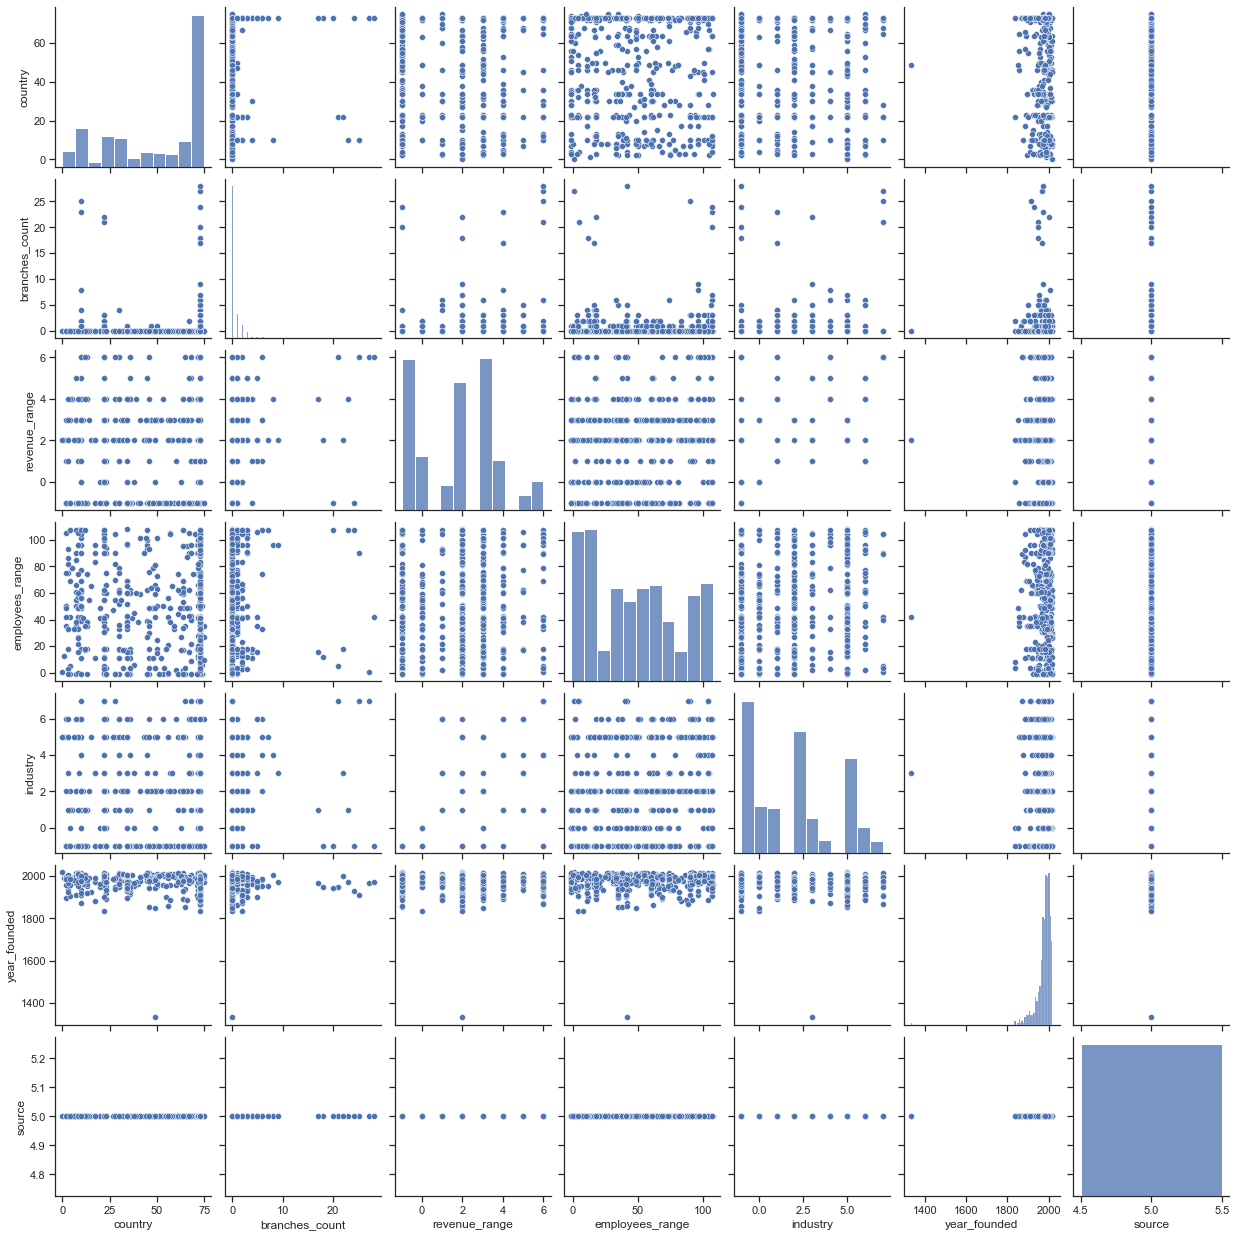

In [9]:
# draw grid plot for all features
draw_grid_plot(df_sample)


In [52]:
# read the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

# read all the data sets
lockbit = pd.read_csv('data/lockbit2-v5.csv')
bianlian = pd.read_csv('data/BianLian.csv')
blackbasta = pd.read_csv('data/BlackBasta-v2.csv')
playnews = pd.read_csv('data/PlayNews.csv')
royal = pd.read_csv('data/Royal.csv')
vicesociety = pd.read_csv('data/ViceSociety.csv')
# concatenate all the data sets
df_attacked = pd.concat([lockbit, bianlian, blackbasta, playnews, royal, vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_attacked.drop(['date_added', 'progress'], axis=1, inplace=True)

In [53]:
df_attacked.drop(['ispublished'], axis=1, inplace=True)

In [54]:
df_attacked.columns

Index(['_id', 'branches_count', 'company_name', 'company_status', 'content',
       'country', 'deadline', 'description', 'display_name', 'employees_count',
       'employees_range', 'industry', 'last_seen', 'latitude', 'link',
       'longitude', 'revenue', 'revenue_range', 'source', 'technologies_used',
       'views', 'year_founded'],
      dtype='object')

In [55]:
df_attacked = df_attacked[["employees_range", "revenue_range", "industry", "source" ]]
df_attacked.head()

,employees_range,revenue_range,industry,source
0,NaN,NaN,Automotive,lockbit
1,"1,000 - 5,000",200M - 1B,Computer Hardware,lockbit
2,"5,000 - 10,000",> 1B,Financial Services,lockbit
3,NaN,NaN,Wholesale,lockbit
4,"1,000 - 5,000",200M - 1B,Chemicals,lockbit


In [56]:
from utils import clean_unique_values, clean_revenue_range
new_df = df_attacked.copy()
# get the unique values for revenue_range column
unique_values = new_df['revenue_range'].unique()
# clean 'revenue_range' column
clean_range, formalized_values = clean_unique_values(unique_values)

# apply the clean_revenue_range function to the revenue_range column
new_df['revenue_range_cleaned'] = new_df['revenue_range'].apply(lambda x: clean_revenue_range(x, clean_range, formalized_values))
new_df['revenue_range_cleaned'].unique()

array([nan, '200M - 1B', '> 1B', '0 - 1M', '10M - 50M', '1M - 10M',
       '100M - 200M', '50M - 100M'], dtype=object)

In [57]:
# get the unique values for revenue_range column
unique_values = new_df['employees_range'].unique()
# clean 'revenue_range' column
clean_range, formalized_values = clean_unique_values(unique_values)
# apply the clean_revenue_range function to the revenue_range column
new_df['employees_range_cleaned'] = new_df['employees_range'].apply(lambda x: clean_revenue_range(x, clean_range, formalized_values))
new_df['employees_range_cleaned'].unique()

array([nan, '1,000 - 5,000', '5,000 - 10,000', '1 - 10', '200 - 500',
       '10 - 50', '50 - 200', '500 - 1,000', '> 10,000'], dtype=object)

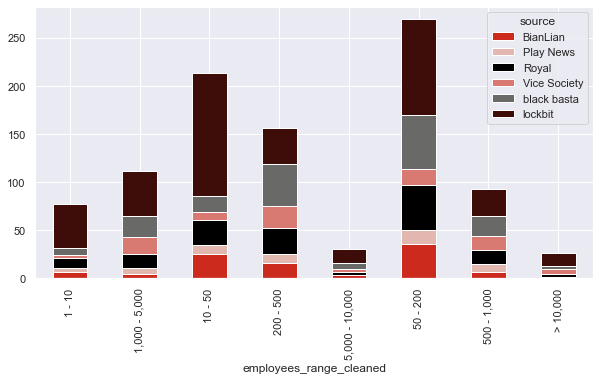

In [77]:
sns.set_theme(style="darkgrid")
# drop the null values from employees_range 
new_df.dropna(subset=['employees_range_cleaned'], inplace=True)
# compare between each source and their relations with the employees_range
new_df.groupby(['source', 'employees_range_cleaned']).size().reset_index(name='counts')
# draw a stacked bar chart to show the relationship between source and employees_range
df_employees_range = new_df.groupby(['source','employees_range_cleaned']).size().reset_index(name='counts')
df_employees_range = df_employees_range.pivot(index='employees_range_cleaned', columns='source', values='counts')
# increase the figure size
plt.rcParams['figure.figsize'] = [10, 5]
color_palette = sns.color_palette("blend:#CB2A1D,#e1b7b0,#000,#d87a71,#696968,#3e0d09", 6)
df_employees_range.plot(kind='bar', stacked=True, color=color_palette)
plt.show()

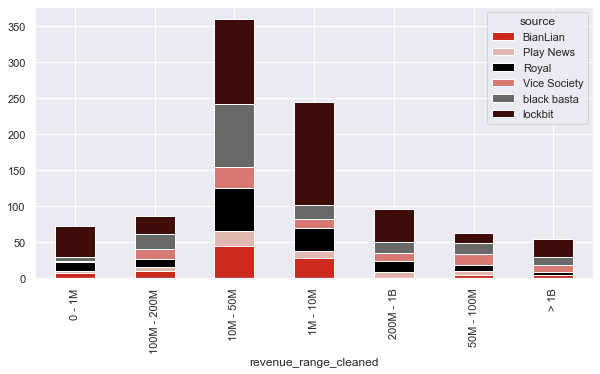

In [78]:
sns.set_theme(style="darkgrid")
# drop the null values from employees_range 
new_df.dropna(subset=['revenue_range_cleaned'], inplace=True)
# compare between each source and their relations with the employees_range
new_df.groupby(['source', 'revenue_range_cleaned']).size().reset_index(name='counts')
# draw a stacked bar chart to show the relationship between source and employees_range
df_revenue_range = new_df.groupby(['source','revenue_range_cleaned']).size().reset_index(name='counts')
df_revenue_range = df_revenue_range.pivot(index='revenue_range_cleaned', columns='source', values='counts')
# increase the figure size
plt.rcParams['figure.figsize'] = [10, 5]
color_palette = sns.color_palette("blend:#CB2A1D,#e1b7b0,#000,#d87a71,#696968,#3e0d09", 6)
df_revenue_range.plot(kind='bar', stacked=True, color=color_palette)
plt.show()

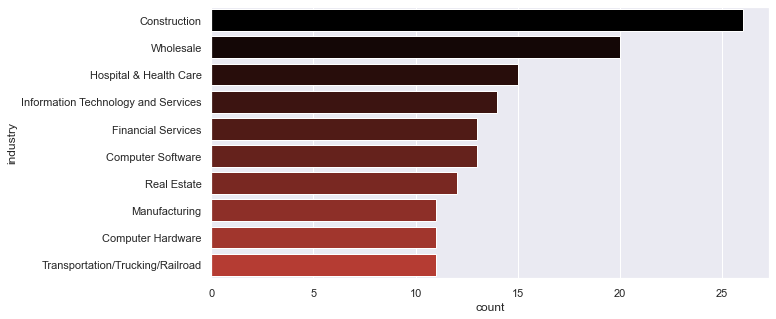

In [99]:
color_palette = sns.color_palette("blend:#000,#CB2A1D",10)
# draw a count plot for the top 10 industries that lockbit attacked
sns.set_theme(style="darkgrid")
sns.countplot(y="industry", palette=color_palette,data=new_df[new_df["source"]=="lockbit"], order=new_df[new_df["source"]=="lockbit"]["industry"].value_counts().iloc[:10].index)
plt.show()


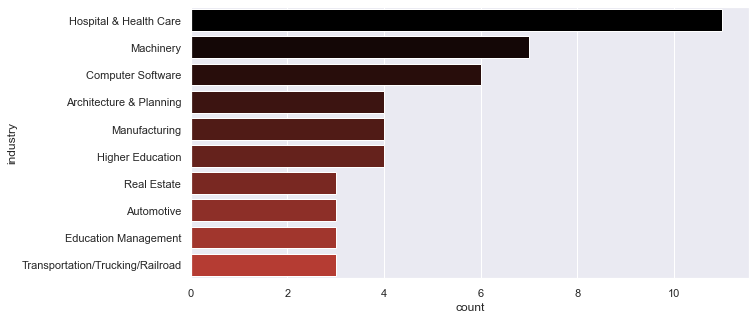

In [100]:
# draw a count plot for the top 10 industries that lockbit attacked
color_palette = sns.color_palette("blend:#000,#CB2A1D",10)
sns.set_theme(style="darkgrid")
sns.countplot(y="industry",palette=color_palette, data=new_df[new_df["source"]=="BianLian"], order=new_df[new_df["source"]=="BianLian"]["industry"].value_counts().iloc[:10].index)
plt.show()

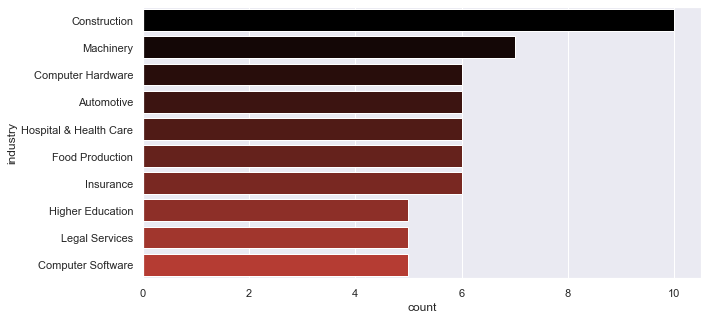

In [101]:
# draw a count plot for the top 10 industries that lockbit attacked
color_palette = sns.color_palette("blend:#000,#CB2A1D",10)
sns.set_theme(style="darkgrid")
sns.countplot(y="industry", palette=color_palette,data=new_df[new_df["source"]=="Royal"], order=new_df[new_df["source"]=="Royal"]["industry"].value_counts().iloc[:10].index)
plt.show()

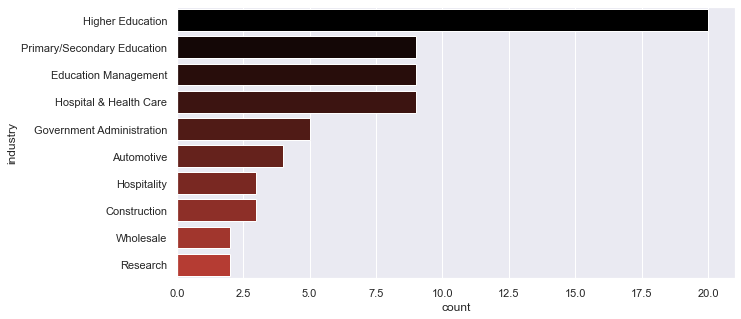

In [102]:
# draw a count plot for the top 10 industries that lockbit attacked
color_palette = sns.color_palette("blend:#000,#CB2A1D",10)
sns.set_theme(style="darkgrid")
sns.countplot(y="industry",palette=color_palette, data=new_df[new_df["source"]=="Vice Society"], order=new_df[new_df["source"]=="Vice Society"]["industry"].value_counts().iloc[:10].index)
plt.show()

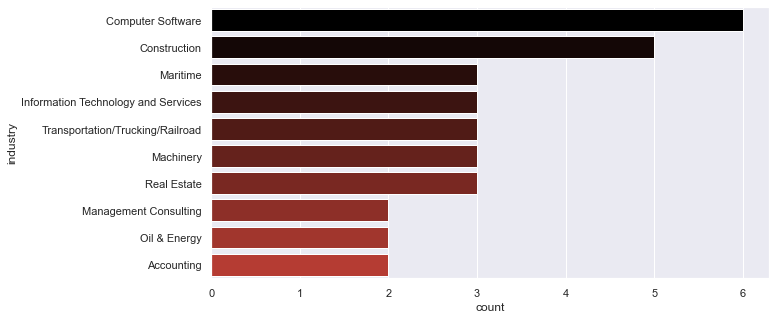

In [103]:
# draw a count plot for the top 10 industries that lockbit attacked
color_palette = sns.color_palette("blend:#000,#CB2A1D",10)
sns.set_theme(style="darkgrid")
sns.countplot(y="industry", palette=color_palette,data=new_df[new_df["source"]=="Play News"], order=new_df[new_df["source"]=="Play News"]["industry"].value_counts().iloc[:10].index)
plt.show()

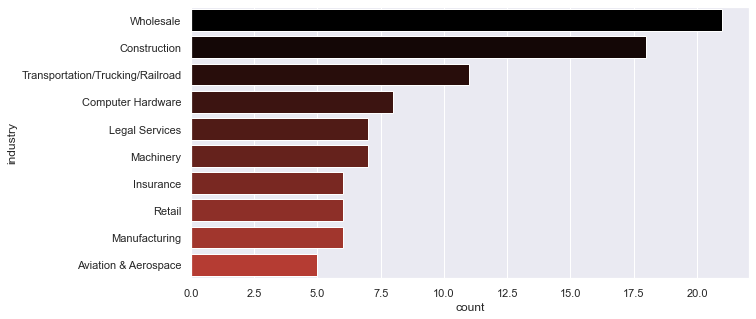

In [104]:
# draw a count plot for the top 10 industries that lockbit attacked
color_palette = sns.color_palette("blend:#000,#CB2A1D",10)
sns.set_theme(style="darkgrid")
sns.countplot(y="industry", palette=color_palette,data=new_df[new_df["source"]=="black basta"], order=new_df[new_df["source"]=="black basta"]["industry"].value_counts().iloc[:10].index)
plt.show()